In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import decisionboundaryplot as dbp
from sklearn.decomposition import PCA
# from IPython.display import set_matplotlib_formats
# import matplotlib_inline.backend_inline
# matplotlib_inline.backend_inline.set_matplotlib_formats('pdf')

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

%matplotlib widget



In [108]:
# blockwise_results_path=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\blockwise_crossval_save_models\626791_2022-08-17_0_blockwise_crossval_save_models.pkl"
blockwise_results_path=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\blockwise_crossval_testing\668755_2023-08-30_0_blockwise_crossval_linear_SVC_balanced_trainset.pkl"
with open(blockwise_results_path,'rb') as handle:
    blockwise_results=pickle.load(handle)

In [11]:
# random_results_path=r"C:\Users\ethan.mcbride\OneDrive - Allen Institute\DR decoding results\by_session\blockwise_crossval_save_models\626791_2022-08-17_0_5_fold_crossval_save_models.pkl"
# with open(random_results_path,'rb') as handle:
#     random_results=pickle.load(handle)

# blockwise_results=random_results

In [109]:
blockwise_results['block_ids']['all'][0][0][0].keys()

dict_keys(['cr', 'pred_label', 'true_label', 'trials_used', 'predict_proba', 'coefs', 'classes', 'params', 'balanced_accuracy', 'pred_label_train', 'true_label_train', 'cr_train', 'balanced_accuracy_train', 'train_trials', 'test_trials', 'models', 'label_names', 'input_data', 'labels', 'shuffle', 'trial_sel_idx', 'unit_sel_idx'])

In [104]:
blockwise_results['block_ids'].keys()

dict_keys(['all', 'VPL', 'VPM', 'ProS', 'CP', 'SSp_probeE', 'SSp_probeF', 'VISp_probeD', 'LD', 'LP', 'VISp_probeC', 'VISam', 'SSp_probeA', 'MRN', 'PIL', 'CA1_probeA', 'RSPagl_probeA', 'VISa', 'SCiw', 'ZI', 'DG_probeD', 'POST', 'PO_probeB', 'MGv'])

In [71]:
blockwise_results['block_ids']['all'][0][0][0]['models']

[RandomForestClassifier(class_weight='balanced'),
 RandomForestClassifier(class_weight='balanced'),
 RandomForestClassifier(class_weight='balanced'),
 RandomForestClassifier(class_weight='balanced'),
 RandomForestClassifier(class_weight='balanced'),
 RandomForestClassifier(class_weight='balanced')]

In [72]:
blockwise_results['block_ids']['all'][0][0][0]['input_data']

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  5., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  5.],
       [ 0.,  0.,  0., ...,  0.,  0., 15.]])

In [73]:
blockwise_results['block_ids']['all'][0][0][0]['labels']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [81]:
blockwise_results['block_ids']['all'][0][0][0]['pred_label']

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [110]:
blockwise_results['block_ids']['all'][0][0][0]['balanced_accuracy']

0.8404669260700389

In [65]:
sel_set=0
model=blockwise_results['block_ids']['all'][0][0][0]['models'][sel_set]
data=blockwise_results['block_ids']['all'][0][0][0]['input_data']
labels=blockwise_results['block_ids']['all'][0][0][0]['labels']
train_idx=blockwise_results['block_ids']['all'][0][0][0]['train_trials'][sel_set].tolist()

In [ ]:
# train_idx.tolist()
# labels

Step 1/3: 0/16
Step 1/3: 1/16
Step 1/3: 2/16
Step 1/3: 3/16
Step 1/3: 4/16
Step 1/3: 5/16
Step 1/3: 6/16
Step 1/3: 7/16
Step 1/3: 8/16
Step 1/3: 9/16
Step 1/3: 10/16
Step 1/3: 11/16
Step 1/3: 12/16
Step 1/3: 13/16
Step 1/3: 14/16
Step 1/3: 15/16
Step 2/3: 0/20
Step 2/3: 1/20
Step 2/3: 2/20
Step 2/3: 3/20
Step 2/3: 4/20
Step 2/3: 5/20
Step 2/3: 6/20
Step 2/3: 7/20
Step 2/3: 8/20
Step 2/3: 9/20
Step 2/3: 10/20
Step 2/3: 11/20
Step 2/3: 12/20
Step 2/3: 13/20
Step 2/3: 14/20
Step 2/3: 15/20
Step 2/3: 16/20
Step 2/3: 17/20
Step 2/3: 18/20
Step 2/3: 19/20
Step 3/3:0/
Step 3/3:1/
Step 3/3:2/
Step 3/3:3/
Step 3/3:4/
No good solution along straight line - trying to find decision boundary on hypersphere surface around known decision boundary point
Step 3/3:5/
No good solution along straight line - trying to find decision boundary on hypersphere surface around known decision boundary point
Step 3/3:6/
No good solution along straight line - trying to find decision boundary on hypersphere surface a

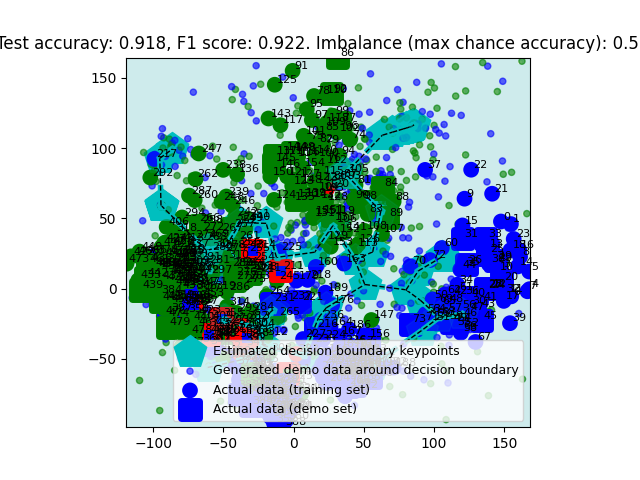

In [82]:
ax=plt.figure()
db = dbp.DBPlot(model, PCA(n_components=2))
db.fit(data, labels, train_idx)
db.plot().show()

In [ ]:
# labels=blockwise_results['block_ids']['all'][0][1][0]['labels']=='vis'
labels=[]

np.array((np.arange(len(np.unique(labels))),
         np.unique(labels, return_counts=True)[1])).T.astype(float)


# np.array(np.unique(blockwise_results['block_ids']['all'][0][1][0]['labels']=='vis', return_counts=True)).T.astype(float)

In [ ]:
labels=blockwise_results['block_ids']['all'][0][0][0]['labels']
unique_labels=np.unique(labels)
labels=np.array([np.where(unique_labels==x)[0][0] for x in labels])
labels

In [ ]:
y_testpoints = []
freq = np.array(np.unique(y_testpoints, return_counts=True)).T.astype(
                    float
                )
freq

In [ ]:
db.plot().show()

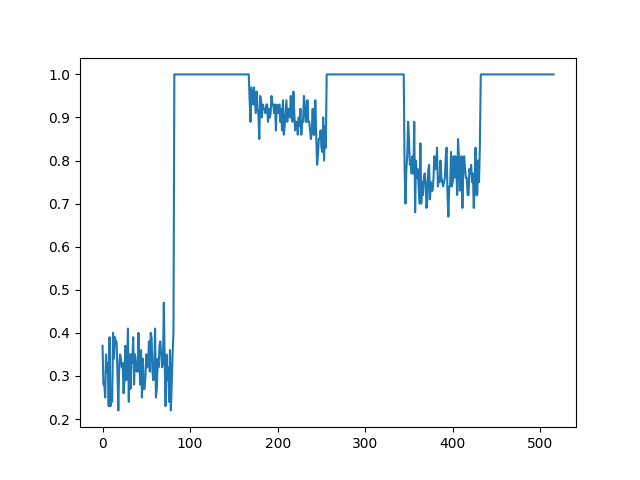

In [115]:
fig,ax=plt.subplots()
# ax.plot(blockwise_results['block_ids']['all'][0][0][0]['decision_function'])
ax.plot(blockwise_results['block_ids']['all'][0][0][0]['predict_proba'][:,0])

In [84]:
from sklearn import tree

tree.plot_tree(model)

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got RandomForestClassifier(class_weight='balanced') instead.

In [85]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    model, data, labels, n_repeats=10, random_state=42, n_jobs=2
)

In [86]:
result

{'importances_mean': array([0.        , 0.        , 0.00144928, ..., 0.00248447, 0.        ,
        0.        ]),
 'importances_std': array([0.        , 0.        , 0.00094877, ..., 0.00222988, 0.        ,
        0.        ]),
 'importances': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00207039, 0.00207039, 0.00207039, ..., 0.        , 0.        ,
         0.00207039],
        ...,
        [0.00414079, 0.00207039, 0.00621118, ..., 0.00207039, 0.        ,
         0.00207039],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])}

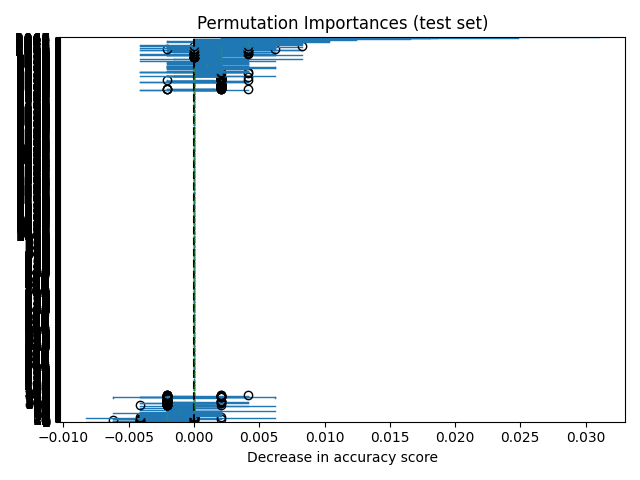

In [88]:
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=np.arange(data.shape[1]),
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()